<a href="https://colab.research.google.com/github/emmacionca/data_curation_and_analysis/blob/main/eac4697_data_curation_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
try:
    import pandas as pd
    import requests
    from bs4 import BeautifulSoup
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    print ("APIs already installed and imported")
except:
    !pip install pandas
    import pandas as pd
    !pip install beautifulsoup4
    from bs4 import BeautifulSoup
    import matplotlib.pyplot as plt
    !pip install seaborn
    import seaborn as sns
    !pip install numpy
    import numpy as np
    print ("APIs not found. Installed them and imported")

import requests

sns.set_style('darkgrid')

APIs already installed and imported


Check if APIs are already installed. If not, install and import them.

Install seaborn library for formatting graphs.

In [3]:
webpage = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")
print ("Opened webpage")

soup = BeautifulSoup(webpage.content, "html.parser")
print ("Parsed webpage")

Opened webpage
Parsed webpage


Open webpage — store in variable.

Initialize BeautifulSoup object to read and parse webpage.

In [6]:
table = soup.find('table', class_='wikitable')


Find the table by checking which table has class `wikitable`.

In [7]:
messy_data = []

table_rows = table.find_all('tr')
for row in table_rows:
  line = ""
  table_columns = row.find_all('td')
  for column in table_columns:
    # Add a new line to seperate columns in case the value doesn't have a new
    # line included.
    line += column.text + '\n'
  messy_data.append(line)

print(messy_data)

['', 'World\n\n8,063,792,000\n100%\n5 Oct 2023\n\nUN projection[3]\n\n\n', '\xa0China\n\n1,411,750,000\n17.5%\n31 Dec 2022\n\nOfficial estimate[4]\n[b]\n\n', '\xa0India\n\n1,392,329,000\n17.3%\n1 Mar 2023\n\nOfficial projection[5]\n[c]\n\n', '\xa0United States\n\n335,466,000\n4.2%\n5 Oct 2023\n\nNational population clock[7]\n[d]\n\n', '\xa0Indonesia\n\n278,696,200\n3.5%\n1 Jul 2023\n\nNational annual projection[8]\n\n\n', '\xa0Pakistan\n\n241,499,431\n3.0%\n1 Mar 2023\n\n2023 census result[9]\n[e]\n\n', '\xa0Nigeria\n\n216,783,400\n2.7%\n21 Mar 2022\n\nOfficial projection[10]\n\n\n', '\xa0Brazil\n\n203,062,512\n2.5%\n1 Aug 2022\n\n2022 census result[11]\n\n\n', '\xa0Bangladesh\n\n169,828,911\n2.1%\n14 Jun 2022\n\n2022 census result[12]\n\n\n', '\xa0Russia\n\n146,424,729\n1.8%\n1 Jan 2023\n\nOfficial estimate[13]\n[f]\n\n', '\xa0Mexico\n\n129,202,482\n1.6%\n30 Jun 2023\n\nNational quarterly estimate[14]\n\n\n', '\xa0Japan\n\n124,450,000\n1.5%\n1 Sep 2023\n\nOfficial estimate[15]\n\n\n',

Create a list to store the raw data in.

Find all table rows by searching for `tr` HTML element.

Iterate through rows and find all data cells by searching for `td` HTML element.

Convert HTML to text using `.text` and append everything to `messy_data` list.

In [38]:
def wiki_int_to_int(wiki_int):
  wiki_int = wiki_int.replace(',', '')
  return int(wiki_int)

def wiki_percent_to_float(wiki_percent):
  wiki_percent = wiki_percent.replace('%', '')
  return float(wiki_percent)

def wiki_string_to_string(wiki_string):
  return wiki_string.replace('\xa0', '')

def wiki_source_to_string(wiki_source):
  return wiki_source[0:wiki_source.find('[')]

Define a function that removes the commas from numbers in order to convert the data type to `int`.

Define a function that removes the percent sign from a percentage in order to convert the data type to `float`.

Define a function that removes `\xa0` character from the data.

In [39]:
column_names = ['Country / Dependency', 'Population', '% of world', 'Date', 'Source (official or from the United Nations)']
column_types = ['wiki_string', 'wiki_int', 'wiki_percent', 'wiki_date', 'wiki_source']
cleaned_data = []

for text_row in messy_data:
    # Skip over empty rows.
    if text_row == '':
      continue
    column_values = text_row.split('\n')
    row = {} # empty dictionary for every row
    # Match values to columns by index.
    column_value_index = 0
    for column_value in column_values:
        # Skip over empty columns.
        if column_value == '':
          continue
        # Checking if there aren't more values than outlined in the arrays at
        # the top.
        if column_value_index < len(column_names):
          # Convert the value to the proper Python type.
          if column_types[column_value_index] == 'wiki_int':
            value = wiki_int_to_int(column_value)
          elif column_types[column_value_index] == 'wiki_percent':
            value = wiki_percent_to_float(column_value)
          elif column_types[column_value_index] == 'wiki_string':
            value = wiki_string_to_string(column_value)
          elif column_types[column_value_index] == 'wiki_source':
            value = wiki_source_to_string(column_value)
          else:
            # Dates are not cleaned up and kept as plain strings.
            value = column_value
          row[column_names[column_value_index]] = value
          # Only increment the index after non empty columns.
          column_value_index += 1
        else:
          break
    # Remove the data point corresponding to World data because it's irrelevant.
    if row['Country / Dependency'] == 'World':
      continue
    cleaned_data.append(row)

print(cleaned_data[:5])

[{'Country / Dependency': 'China', 'Population': 1411750000, '% of world': 17.5, 'Date': '31 Dec 2022', 'Source (official or from the United Nations)': 'Official estimate'}, {'Country / Dependency': 'India', 'Population': 1392329000, '% of world': 17.3, 'Date': '1 Mar 2023', 'Source (official or from the United Nations)': 'Official projection'}, {'Country / Dependency': 'United States', 'Population': 335466000, '% of world': 4.2, 'Date': '5 Oct 2023', 'Source (official or from the United Nations)': 'National population clock'}, {'Country / Dependency': 'Indonesia', 'Population': 278696200, '% of world': 3.5, 'Date': '1 Jul 2023', 'Source (official or from the United Nations)': 'National annual projection'}, {'Country / Dependency': 'Pakistan', 'Population': 241499431, '% of world': 3.0, 'Date': '1 Mar 2023', 'Source (official or from the United Nations)': '2023 census result'}]


Define a list of the column names.

Define a list of the column types.

Define a list for what will be the cleaned data.

Iterate through every row in the messy data, if the row is empty, skip.

Split each row at the previously inserted newline character to get the column values as strings.

Define a dictionary for every row.

Iterate through each value in the column values, skip if empty.

Convert each value to the pre-decided types by checking the index and using the pre-defined function.

Remove irrelevant data points.

Append to `cleaned_data` list.

In [40]:
cleaned_data = pd.DataFrame(cleaned_data)

cleaned_data

,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,China,1411750000,17.5,31 Dec 2022,Official estimate
1,India,1392329000,17.3,1 Mar 2023,Official projection
2,United States,335466000,4.2,5 Oct 2023,National population clock
3,Indonesia,278696200,3.5,1 Jul 2023,National annual projection
4,Pakistan,241499431,3.0,1 Mar 2023,2023 census result
...,...,...,...,...,...
236,Tokelau (NZ),1647,0.0,1 Jan 2019,2019 Census
237,Niue,1549,0.0,1 Jul 2021,National annual projection
238,Vatican City,764,0.0,26 Jun 2023,Official figure
239,Cocos (Keeling) Islands (Australia),593,0.0,30 Jun 2020,2021 Census


Create a data frame and print elements.


In [41]:
cleaned_data.to_csv("Sovereign_states_and_dependencies_by_population.csv")

Create a CSV file.

In [42]:
Sovereign_states_and_dependencies_by_population_df = pd.read_csv("Sovereign_states_and_dependencies_by_population.csv")

Open and read the CSV file.

In [43]:
country_dependency = Sovereign_states_and_dependencies_by_population_df['Country / Dependency']

population = Sovereign_states_and_dependencies_by_population_df['Population']

percent_of_world = Sovereign_states_and_dependencies_by_population_df['% of world']

date = Sovereign_states_and_dependencies_by_population_df['Date']

source = Sovereign_states_and_dependencies_by_population_df['Source (official or from the United Nations)']

Access column data and store in variables.

In [18]:
country_dependency.describe()


count       241
unique      241
top       China
freq          1
Name: Country / Dependency, dtype: object

Describe Country / Dependency data.

In [19]:
population.describe()


count    2.410000e+02
mean     3.263867e+07
std      1.330924e+08
min      4.700000e+01
25%      3.012950e+05
50%      5.426352e+06
75%      2.203700e+07
max      1.411750e+09
Name: Population, dtype: float64

Describe population data.

In [20]:
percent_of_world.describe()


count    241.000000
mean       0.401775
std        1.652470
min        0.000000
25%        0.004000
50%        0.070000
75%        0.300000
max       17.500000
Name: % of world, dtype: float64

Describe percent of world data.

In [21]:
date.describe()


count            241
unique            65
top       1 Jul 2023
freq              32
Name: Date, dtype: object

Describe date data.

In [22]:
source.describe()

count                                 241
unique                                227
top       National annual projection[182]
freq                                    8
Name: Source (official or from the United Nations), dtype: object

Describe source data.

Text(0.5, 1.0, 'Country vs. Population')

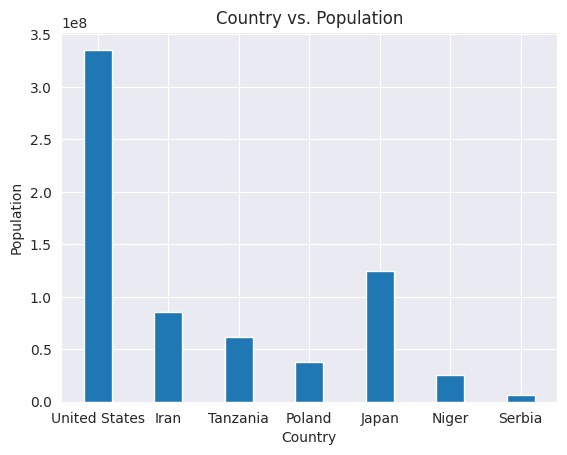

In [27]:
some_countries = [2, 16, 22, 37, 10, 22, 55, 109]

country_column = Sovereign_states_and_dependencies_by_population_df['Country / Dependency']
population_column = Sovereign_states_and_dependencies_by_population_df['Population']

selected_countries = []
selected_populations = []

for country_id in some_countries:
    selected_countries.append(country_column[country_id])
    selected_populations.append(population_column[country_id])

plt.bar(selected_countries, selected_populations, width = 0.4)

plt.xlabel("Country")
plt.ylabel("Population")

plt.title("Country vs. Population")

Select which indexes of data to plot.

Access country and population data.

Create variables to store selected countries and populations.

Iterate through previously selected indexes and append the data point for each one to selected countries and populations lists.

Plot bar graph.

Add axis labels and title.

Insights: There is a large difference of population size in the different countries. For example, the United States has a much larger population than Serbia, as shown by the difference in size of the bar.

Text(0.5, 1.0, 'Population vs. Percentage of world')

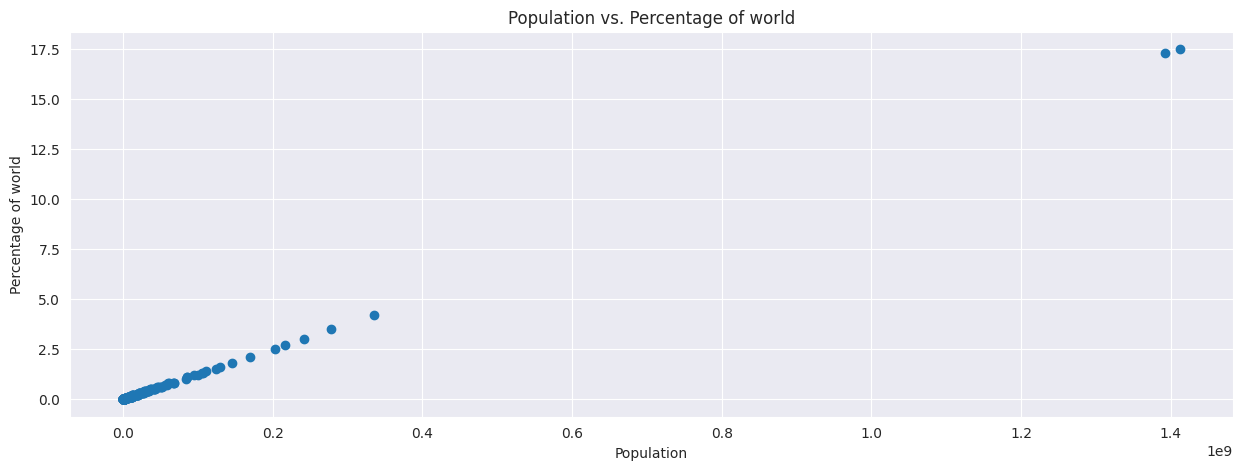

In [31]:
population_column = Sovereign_states_and_dependencies_by_population_df['Population']
percent_of_world_column = Sovereign_states_and_dependencies_by_population_df['% of world']

plt.figure(figsize = (15, 5))
plt.scatter(population_column, percent_of_world_column)

plt.xlabel("Population")
plt.ylabel("Percentage of world")

plt.title("Population vs. Percentage of world")

Access population and percentage of world data.

Plot scatterplot.

Label axis and add title.

Insight: Population and percentage of world have a 1.0 correlation, as expected, as is shown by the perfect straight line in the plot.

Text(0, 0.5, 'Population')

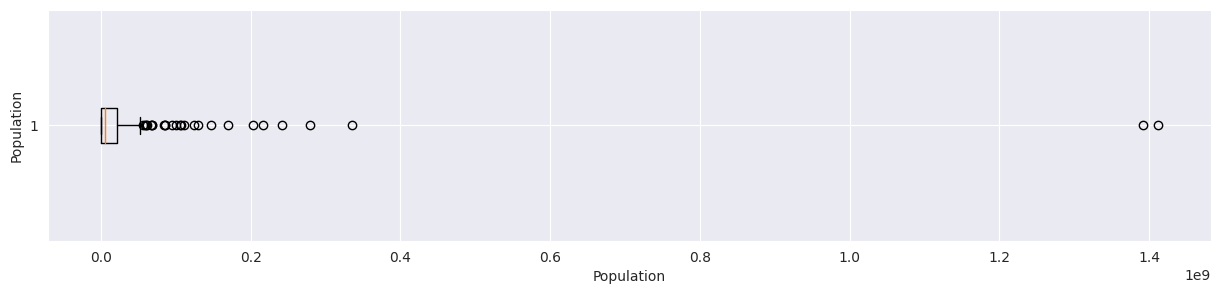

In [33]:
population_column = Sovereign_states_and_dependencies_by_population_df['Population']

plt.figure(figsize = (15, 3))
plt.boxplot(population_column, vert=False)

plt.xlabel("Population")
plt.ylabel("Population")

Access population data.

Adjust size of boxplot to fit data.

Plot boxplot.

Label axis.

Insight: There is evidence of a very skewed distribution in the countries' populations, with extreme outliers such as China and India. Out of the 241 countries, approximately 20 are outliers. The mean of the data is approximately 3.26 million, with a minimum of 47 and a max of approximately 1.41 billion.

Text(0, 0.5, 'Counts')

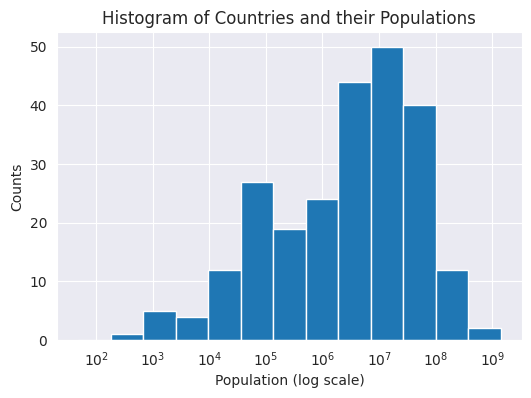

In [36]:
population_column = Sovereign_states_and_dependencies_by_population_df['Population']

plt.figure(figsize = (6, 4))

# Makes bins with powers of 10
irrelevant_value, bins = np.histogram(np.log10(population_column + 1), bins = 'auto')
# Makes the bins equal on the graph despite each one being 10 times bigger than
# the previous.
plt.gca().set_xscale('log')
# Histogram with powers of 10 to handle extreme outliers(China, India, etc.) and
# skewed data to create a better visualization
plt.hist(population_column, bins=10**bins)

plt.title("Histogram of Countries and their Populations")
plt.xlabel('Population (log scale)')
plt.ylabel('Counts')

Access population data.

Adjust histogram to fit data.

Get a list of bins with powers of 10.

Adjust scale of histogram so that the bins are represented equally on the graph.

Plot histogram.

Label axis.

Insight: Given the skewdness of the data and the number of outliers, I plotted the histogram with logarithmic scale buckets to create a normal visual distribution. There are two modes in the data; 27 countries at a population of approx. 100,000 and 50 countries at a population of approx. 10,000,000.

Unnamed: 0                                      241
Country / Dependency                            241
Population                                      241
% of world                                       52
Date                                             65
Source (official or from the United Nations)     30
dtype: int64
Rectangle(xy=(5.55112e-17, 0), width=0.966667, height=65, angle=0)


Text(0, 0.5, 'Counts')

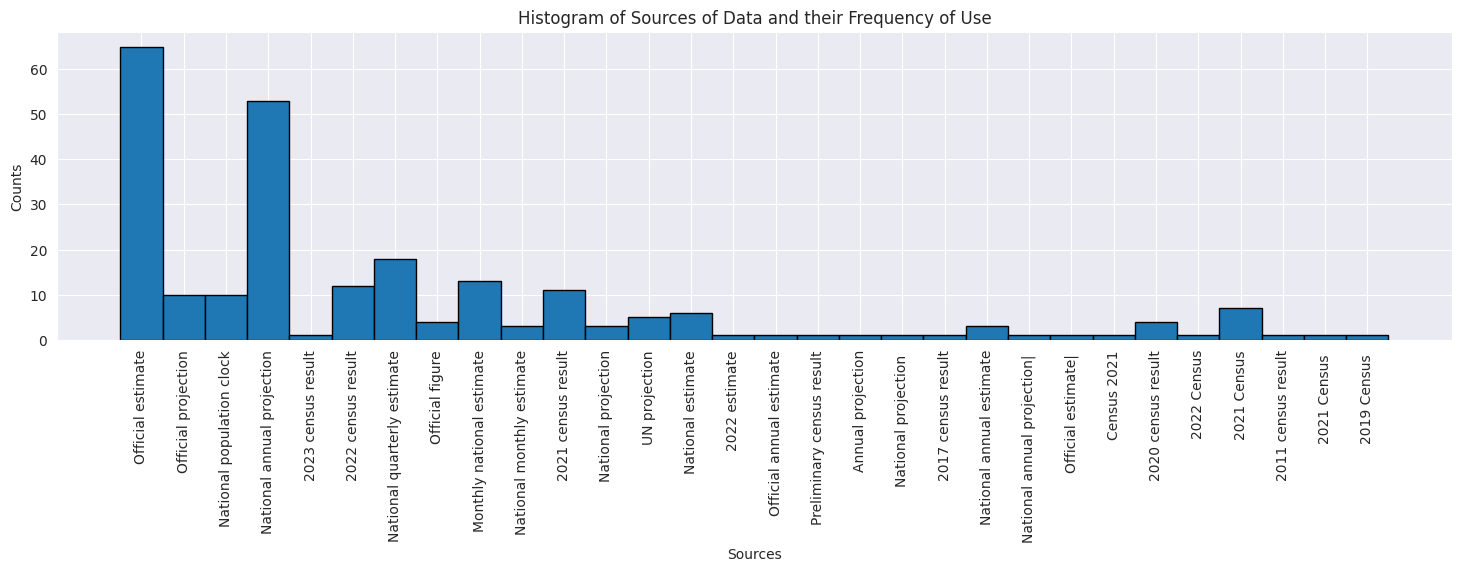

In [62]:
source_column = Sovereign_states_and_dependencies_by_population_df['Source (official or from the United Nations)']

plt.figure(figsize = (18, 4))
# Figure out how many unique labels there are to adjust bin number
print(Sovereign_states_and_dependencies_by_population_df.nunique())

n_bins = 30
n, bins, patches = plt.hist(source_column, bins=n_bins, edgecolor='black')
print (patches[0])
ticks = [(patch.get_x() + patch.get_width()/2) for patch in patches]
plt.xticks(ticks, rotation='vertical')

plt.title("Histogram of Sources of Data and their Frequency of Use")
plt.xlabel('Sources')
plt.ylabel('Counts')

Access source data.

Adjust histogram to fit data.

Figure out how many unique labels there are in the sources to adjust bin number.

Create histogram and adjust so labels are in the center of the bins.

Label axis.

Insight: The data should be trustworthy as most of it comes from the Official Estimate. Around half of the sources have only 1 datapoint coming from it. About half of the data comes from the Official Estimate and National Annual Projection — it comes from the countries themselves.